In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
df = pd.read_csv('UK_foods.csv', index_col=0)

In [3]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


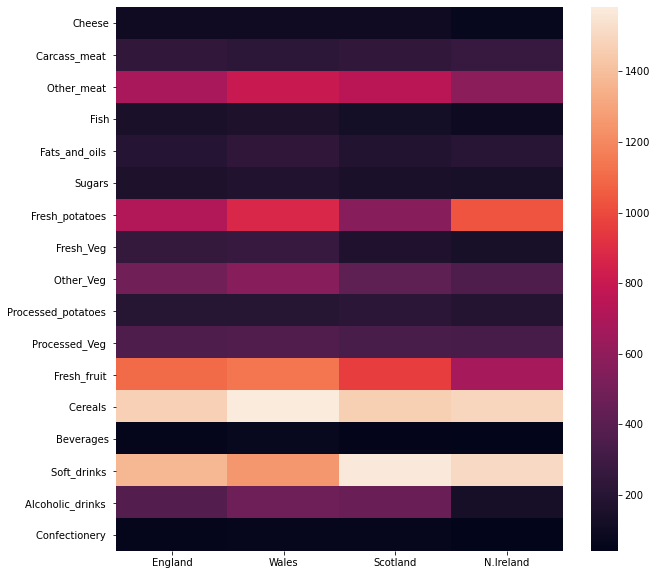

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df);

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
df = df.transpose()

In [8]:
encoder = Sequential()
encoder.add(Dense(units=12, activation='relu', input_shape=[17]))
encoder.add(Dense(units=8, activation='relu'))
encoder.add(Dense(units=4, activation='relu'))
encoder.add(Dense(units=2, activation='relu'))

In [9]:
decoder =  Sequential()
decoder.add(Dense(units=4, activation='relu',input_shape=[2]))
decoder.add(Dense(units=8, activation='relu'))
decoder.add(Dense(units=12, activation='relu'))
decoder.add(Dense(units=17, activation='relu'))

In [10]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=0.01))

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [13]:
scaled_data.shape

(4, 17)

In [14]:
autoencoder.fit(scaled_data,scaled_data, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 497ms/step - loss: 0.4229
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.4222
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4215
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4208
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4201
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.4194
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.4187
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.4181
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4174
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.4167


In [15]:
encoded_data = encoder.predict(scaled_data)

In [16]:
encoded_data

array([[0.12120014, 0.        ],
       [0.12936625, 0.        ],
       [0.035966  , 0.        ],
       [0.394571  , 0.09630867]], dtype=float32)

In [17]:
df.shape

(4, 17)

In [18]:
encoded_data.shape

(4, 2)

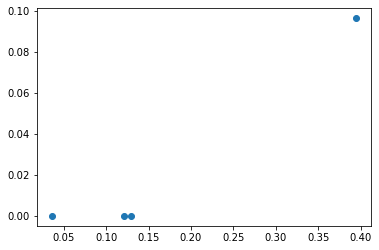

In [19]:
plt.scatter(encoded_data[:,0], encoded_data[:,1]);

In [20]:
encoded_df = pd.DataFrame(encoded_data)

In [21]:
encoded_df

,0,1
0,0.121200,0.000000
1,0.129366,0.000000
2,0.035966,0.000000
3,0.394571,0.096309


In [22]:
encoded_df.rename(index = {0: "England",1:"Wales",2:"Scotland",3:"N.Ireland"},inplace = True)

In [23]:
encoded_df

,0,1
England,0.121200,0.000000
Wales,0.129366,0.000000
Scotland,0.035966,0.000000
N.Ireland,0.394571,0.096309


In [24]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [25]:
pd.concat([df, encoded_df], axis=1)

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery,0,1
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54,0.121200,0.000000
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64,0.129366,0.000000
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62,0.035966,0.000000
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41,0.394571,0.096309


In [26]:
encoded_df

,0,1
England,0.121200,0.000000
Wales,0.129366,0.000000
Scotland,0.035966,0.000000
N.Ireland,0.394571,0.096309


In [27]:
edf = encoded_df.reset_index()

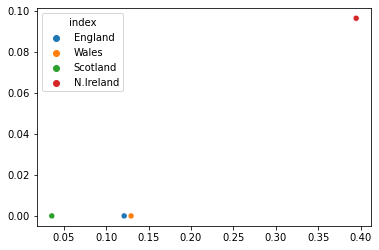

In [28]:
sns.scatterplot(x=encoded_data[:,0], y=encoded_data[:,1], hue=edf['index']);